# TP02b - Arthur Carlos de Faria - 0040421

Modulação e Multiplexação.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.


**Instruções:**
- Use a versão Python 3.x
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.
- Não inclua mais células do que o especificado e mantenha a organização!

**Objetivos**
- Implementar modulação e demodulação de sinais
- Implementar multiplexação e demultiplexação

# Primeiros passos

Neste trabalho você tem um desafio: transmitir três sinais distintos em uma dada largura de banda.

Os sinais a serem transmitidos contém informações que não podem ser perdidas. Contudo, para transmiti-los, você pode usar apenas uma faixa limitada de frequências. Você decidirá a forma de fazer a transmissão do sinal com a banda que tem disponível. Não é permitido usar outras faixas de frequências além da disponibilizada.


<mark>**Fazer:** para ver a sua faixa de frequências, insira o seu RA na variável `RA` abaixo e veja a mensagem de saída.</mark>


*Obs.: não inclua os zeros à esquerda do RA não!*

In [2]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt, time
from scipy import signal

### SEU CÓDIGO COMEÇA AQUI ###
RA = 40421
### SEU CÓDIGO TERMINA AQUI ###

# Frequências máxima e mínima
np.random.seed(RA//3); fmin = np.random.uniform(20,100); fmax = fmin+np.random.uniform(36,40);
print("ATENÇÃO, você tem disponível a faixa de frequências entre %i Hz e %i Hz."%(fmin,fmax))

ATENÇÃO, você tem disponível a faixa de frequências entre 42 Hz e 82 Hz.


# Sinais a serem transmitidos

Neste trabalho você tem um desafio: transmitir três sinais distintos em uma dada largura de banda.

Os sinais a serem transmitidos contém informações que não podem ser perdidas. Contudo, para transmiti-los, você pode usar apenas uma faixa limitada de frequências. Você decidirá a forma de fazer a transmissão do sinal com a banda que tem disponível.

<mark>**Fazer:** entenda as variáveis criadas e rode o código abaixo para ver os sinais nos gráficos.</mark>

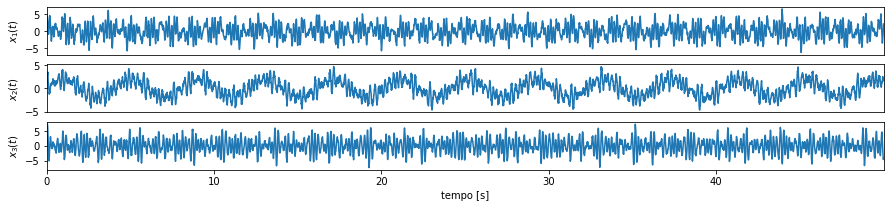

In [3]:
# parâmetros úteis
N = 50000 #número de pontos dos sinais
fs = 1000 #frequência de amostragem (Hz)
T = 1/fs #período de amostragem [s]
t = np.arange(0, N*T, T) #vetor tempo

# sinais "ideais" (informação livre de ruído)
np.random.seed(RA//2)
x1i = 2*np.sum(np.random.rand(7,1)*np.sin(np.random.uniform(0, 7, (7,1))*2*np.pi*t), axis=0)
x2i = 2*np.sum(np.random.rand(7,1)*np.sin(np.random.uniform(0, 7, (7,1))*2*np.pi*t), axis=0)
x3i = 2*np.sum(np.random.rand(7,1)*np.sin(np.random.uniform(0, 7, (7,1))*2*np.pi*t), axis=0)

# sinais com adição de ruído
r = .2*np.sum(np.random.rand(7,1)*np.sin(np.random.uniform(12, 30, (7,1))*2*np.pi*t), axis=0) #ruído
x1 = x1i + r
x2 = x2i + r
x3 = x3i + r

# sinais
plt.figure(figsize=(15,3))
plt.subplot(311); plt.plot(t, x1); plt.ylabel("$x_1(t)$"); plt.xlim((0,max(t))); plt.xticks([])
plt.subplot(312); plt.plot(t, x2); plt.ylabel("$x_2(t)$"); plt.xlim((0,max(t))); plt.xticks([])
plt.subplot(313); plt.plot(t, x3); plt.ylabel("$x_3(t)$"); plt.xlim((0,max(t)))
plt.xlabel("tempo [s]")
plt.show();

# FFT dos sinais

O primeiro passo de um projeto de processamento de sinais é entender as características gerais dos sinais envolvidos. Para isso, a FFT é uma ferramenta bastante útil. Sabe-se que os sinais de informação não tem conteúdo espectral de interesse para frequências superiores a 7 Hz. Contudo, os sinais trabalhados possuem algum ruído acima desse valor. Para verificar isso, faça a FFT dos sinais.


<mark>**Fazer:** FFT dos sinais.</mark>
1. Faça a FFT dos sinais `x1`, `x2`, `x3`
1. Faça três gráficos, um para cada sinal, do módulo da FFT (o gráfico da fase é facultativo)
1. Os gráficos **DEVEM** ter tamanho `figsize=(10,1.5)`
1. Mostre o eixo de frequências sempre em Hz 

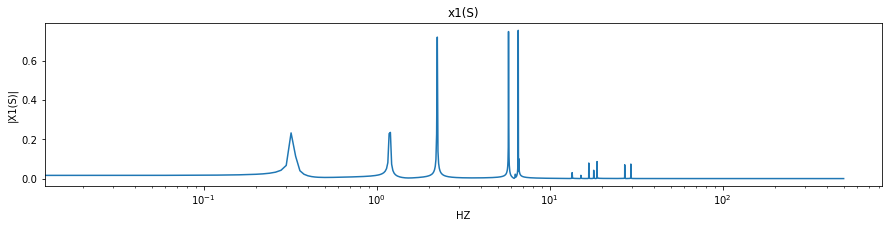

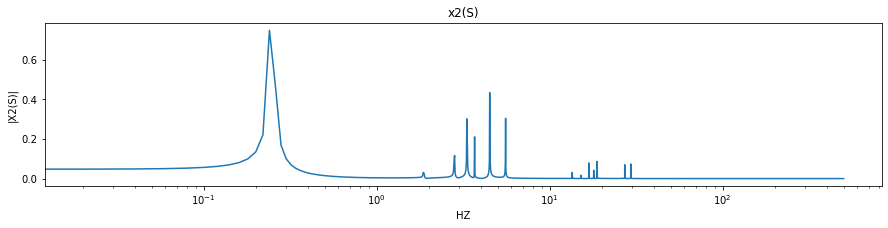

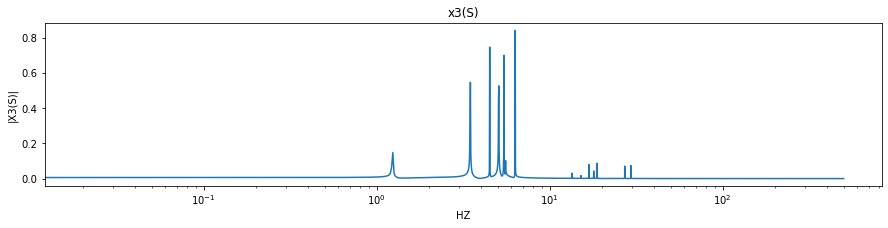

In [4]:
### SEU CÓDIGO COMEÇA AQUI ###
from scipy.fft import fft
#obs: freq maxima do sinal é metade da frequencia de amostragem
#portanto o vetor freq possui valor maximo de fs/2 
freq=np.arange(0,fs,1/(N*T))

xs1=fft(x1)/(len(x1))
xs2=fft(x2)/(len(x2))
xs3=fft(x3)/(len(x3))
meiabandaxs1=xs1[:len(xs1)//2]
meiabandaxs2=xs2[:len(xs2)//2]
meiabandaxs3=xs3[:len(xs3)//2]
freq2=freq[:len(freq)//2]


plt.figure(figsize=(15,3))
plt.ylabel("|X1(S)|")
plt.xlabel("HZ")
plt.title("x1(S)")
plt.xscale("log")
plt.plot(freq2,np.abs(meiabandaxs1))
plt.show()

plt.figure(figsize=(15,3))
plt.ylabel("|X2(S)|")
plt.xlabel("HZ")
plt.xscale("log")
plt.title("x2(S)")
plt.plot(freq2,np.abs(meiabandaxs2))
plt.show()

plt.figure(figsize=(15,3))
plt.ylabel("|X3(S)|")
plt.xlabel("HZ")
plt.xscale("log")
plt.title("x3(S)")
plt.plot(freq2,np.abs(meiabandaxs3))
plt.show()
### SEU CÓDIGO TERMINA AQUI ###

**Saída esperada**:
1. Gráfico do módulo da FFT do sinal `x1`
1. Gráfico do módulo da FFT do sinal `x2`
1. Gráfico do módulo da FFT do sinal `x3`


# Processamento dos sinais analógicos

Use as células abaixo para projetar um sistema que use a banda de frequências disponível (especificada ateriormente) para transmitir os sinais, simultaneamente. Você pode usar qualquer uma das técnicas abordadas na disciplina (filtragem, modulação, multiplexação, etc.), mas atenção para as regras abaixo.

**REGRAS DE PROJETO**:
1. Só podem ser utilizados sistemas analógicos implementáveis na prática. Isso exclui, por exemplo, filtros ideais ou sistemas não causais.
1. Ao projetar filtros, é obrigatório mostrar o diagrama de Bode (amplitude em dB e escala logaritmica no eixo de frequências) do filtro, com tamanho `figsize=(10,4)`, e, no mesmo gráfico, o sombreamente referente às especificações do filtro. Você mesmo deve determinar as especificações de modo a atender o problema e também escolher o tipo de filtro a ser implementado.
1. Ao passar um sinal por um sistema (filtro, modulador, multiplexador, etc.), é obrigatório mostrar, num mesmo gráfico com tamanho `figsize=(10,1.5)`, o módulo da FFT do sinal antes e após o processo de filtragem. Mostrar a fase é facultativo. Sugere-se não representar o sinal em dB.
1. Nesta parte do trabalho você pode usar **até cinco células de código para cada uma das subseções abaixo**. Não é necessário mais que isso, mas você pode usar menos (apague as vazias nesse caso).
1. Todos os gráficos devem ter rótulos nos eixos e escala de ampliação adequada!
1. Organize seu código com comentários e use também os espaços destinados à escrita, identificados com `[descreva aqui...]`.

## Etapa de Pré-processamento

Nesta etapa você pode usar sistemas para pré-processar os sinais, antes de fazer a modulação.



    1: Criação de um filtro passa baixa com wc em 7hz.
    2: Aplição do filtro nos três sinais.
    3: Criação de três filtros para eliminar a banda superior de cada sinal, visto que como sinais reais, apenas metade da banda é necessária. As frequências de corte serão a frequência das portadoras de cada sinal somadas a metade da banda. Os filtros terão as respectivas frequências de corte: 61hz, 69hz e 77hz.

1: Criação de um filtro passa baixa com wc em 7hz.
Ordem do filtro Elliptico Lp:  9
Frequência de ressonância: 43.982297150257104 rad/s


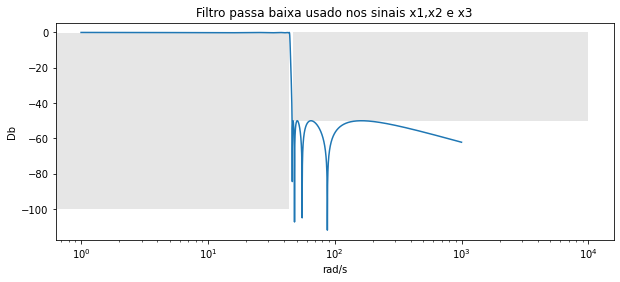

In [5]:
### SEU CÓDIGO COMEÇA AQUI ###
print("1: Criação de um filtro passa baixa com wc em 7hz.")

%matplotlib inline
            #parametros do filtro
Ap=0.2  #atenuação Máxima na banda de passagem   
Ar=50   #atenuação mínima na banda de passagem
wr=7.5*2*np.pi  #frequencia de atenuaçãp
wp=7*2*np.pi  #frequencia de passagem


                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N,Wn    = signal.ellipord(wp, wr, Ap, Ar,analog=True)#filtro lp


print("Ordem do filtro Elliptico Lp: ", N)
print("Frequência de ressonância:", Wn,"rad/s")
z,  p, k = signal.ellip(N,Ap,Ar, Wn, 'lp', True,'zpk')
filtrolp=signal.lti(z,p,k)

w,H= signal.freqresp(filtrolp)

plt.figure(figsize=(10,4))
plt.plot(w,20*np.log10(np.abs(H)))
plt.fill([0,  wp,  wp, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr,  10**4,  10**4,   wr], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa usado nos sinais x1,x2 e x3")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()


### SEU CÓDIGO TERMINA AQUI ###


2: Aplicando o filtro aos 3 sinais


C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=3.91264e-22): result may not be accurate.
  return solve(Q, P)


_____________________Sinais representados em tempo discreto____________________
________legenda____________
|azul   - antes do filtro  |
|amarelo-Depois do filtro  |
|__________________________|


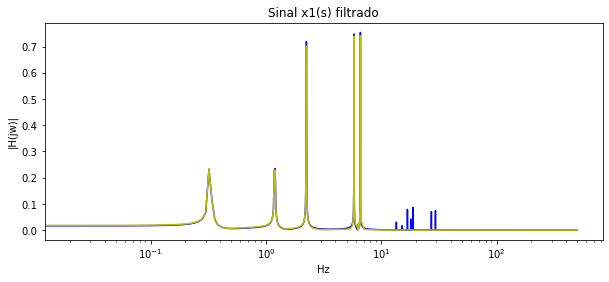

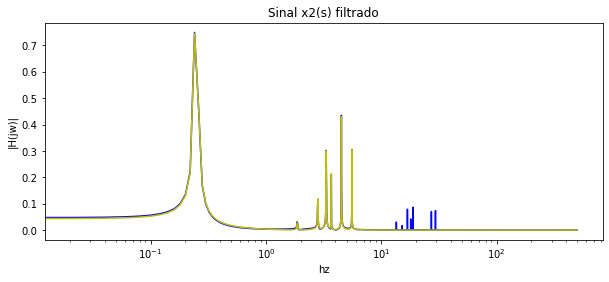

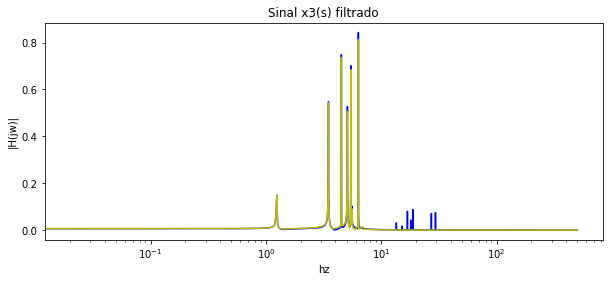

________________________________________________________________________________


In [6]:
### SEU CÓDIGO COMEÇA AQUI ###
print("2: Aplicando o filtro aos 3 sinais")

Tout1,x1lp,Xout=signal.lsim(filtrolp, x1,t)#aplicando filtro passa baixa no sinal x1
Tout2,x2lp,Xout=signal.lsim(filtrolp, x2,t)#aplicando filtro passa baixa no sinal x2
Tout3,x3lp,Xout=signal.lsim(filtrolp, x3,t)#aplicando filtro passa alta no sinal x3


print("_____________________Sinais representados em tempo discreto____________________")
print("________legenda____________")
print("|azul   - antes do filtro  |")
print("|amarelo-Depois do filtro  |")
print("|__________________________|")

x1lps=fft(x1lp)/len(x1lp)# sinal x1s apos passar pelo filtro
x2lps=fft(x2lp)/len(x2lp)# sinal x1s apos passar pelo filtro
x3lps=fft(x3lp)/len(x3lp)# sinal x1s apos passar pelo filtro
x1lps=x1lps[:len(x1lps)//2]
x2lps=x2lps[:len(x2lps)//2]
x3lps=x3lps[:len(x3lps)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(meiabandaxs1),c='b')
plt.plot(freq2,np.abs(x1lps),c='y')
plt.title("Sinal x1(s) filtrado")
plt.xscale("log")
plt.xlabel("Hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(meiabandaxs2),c='b')
plt.plot(freq2,np.abs(x2lps),c='y')
plt.title("Sinal x2(s) filtrado")
plt.xscale("log")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(meiabandaxs3),c='b')
plt.plot(freq2,np.abs(x3lps),c='y')
plt.title("Sinal x3(s) filtrado")
plt.xscale("log")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()
print("________________________________________________________________________________")



### SEU CÓDIGO TERMINA AQUI ###

   3: Criação de três filtros para eliminar a banda superior de cada sinal,
visto que como sinais reais, apenas metade da banda é necessária. As frequências
de corte serão a frequência das portadoras de cada sinal 
Os filtros terão as respectivas frequências de corte: 51hz, 67hz e 77hz.
 
Ordem do filtro Elliptico Lp1:  11
Frequência de ressonância: 51.0 hz
Ordem do filtro Elliptico Lp2:  10
Frequência de ressonância: 67.0 hz
Ordem do filtro Elliptico Lp3:  10
Frequência de ressonância: 77.0 hz


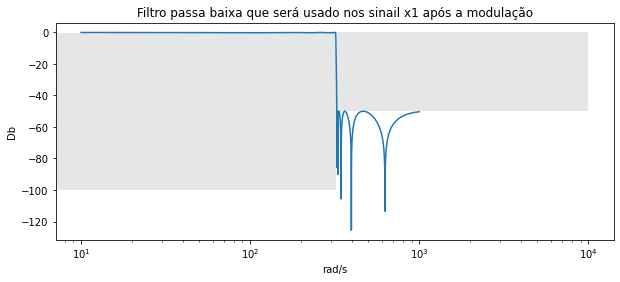

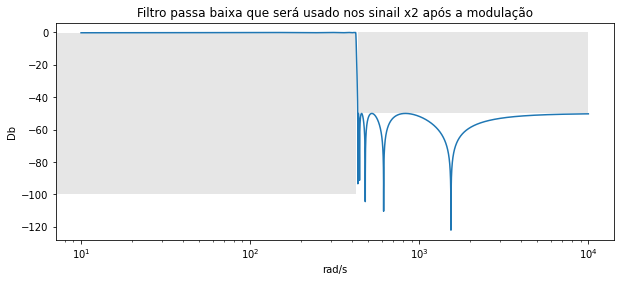

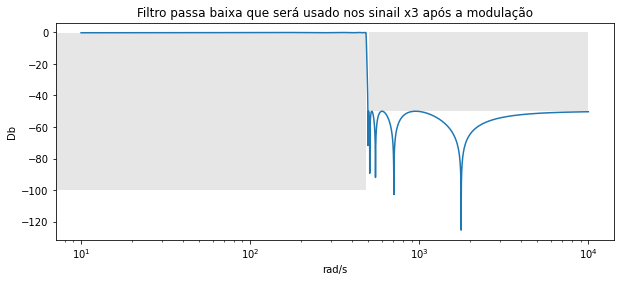

In [7]:
### SEU CÓDIGO COMEÇA AQUI ###

print("   3: Criação de três filtros para eliminar a banda superior de cada sinal,")
print("visto que como sinais reais, apenas metade da banda é necessária. As frequências")
print("de corte serão a frequência das portadoras de cada sinal ")
print("Os filtros terão as respectivas frequências de corte: 51hz, 67hz e 77hz.")
print(" ")


%matplotlib inline
            #parametros do filtro
Ap=0.2  #atenuação Máxima na banda de passagem   
Ar=50   #atenuação mínima na banda de passagem
wr1=52*2*np.pi  #frequencia de atenuaçãp
wp1=51*2*np.pi  #frequencia de passagem
wr2=69*2*np.pi  #frequencia de atenuaçãp
wp2=67*2*np.pi  #frequencia de passagem
wr3=80*2*np.pi  #frequencia de atenuaçãp
wp3=77*2*np.pi  #frequencia de passagem


                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N1,Wn1    = signal.ellipord(wp1, wr1, Ap, Ar,analog=True)#filtro lp
N2,Wn2    = signal.ellipord(wp2, wr2, Ap, Ar,analog=True)#filtro lp
N3,Wn3    = signal.ellipord(wp3, wr3, Ap, Ar,analog=True)#filtro lp


print("Ordem do filtro Elliptico Lp1: ", N1)
print("Frequência de ressonância:", Wn1/(2*np.pi),"hz")
z1,  p1, k1 = signal.ellip(N1,Ap,Ar, Wn1, 'lp', True,'zpk')
filtrolp1=signal.lti(z1,p1,k1)

print("Ordem do filtro Elliptico Lp2: ", N2)
print("Frequência de ressonância:", Wn2/(2*np.pi),"hz")
z2,  p2, k2 = signal.ellip(N2,Ap,Ar, Wn2, 'lp', True,'zpk')
filtrolp2=signal.lti(z2,p2,k2)

print("Ordem do filtro Elliptico Lp3: ", N3)
print("Frequência de ressonância:", Wn3/(2*np.pi),"hz")
z3,  p3, k3 = signal.ellip(N3,Ap,Ar, Wn3, 'lp', True,'zpk')
filtrolp3=signal.lti(z3,p3,k3)

w1,H1= signal.freqresp(filtrolp1)
w2,H2= signal.freqresp(filtrolp2)
w3,H3= signal.freqresp(filtrolp3)

plt.figure(figsize=(10,4))
plt.plot(w1,20*np.log10(np.abs(H1)))
plt.fill([0,  wp1,  wp1, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr1,  10**4,  10**4,   wr1], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa que será usado nos sinail x1 após a modulação")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(w2,20*np.log10(np.abs(H2)))
plt.fill([0,  wp2,  wp2, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr2,  10**4,  10**4,   wr2], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa que será usado nos sinail x2 após a modulação")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(w3,20*np.log10(np.abs(H3)))
plt.fill([0,  wp3,  wp3, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr3,  10**4,  10**4,   wr3], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa que será usado nos sinail x3 após a modulação")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()






### SEU CÓDIGO TERMINA AQUI ###:

## Etapa de Modulação/Multiplexação

Nessa etapa você deve produzir um sinal modulado na variável `xm` que ocupe **apenas a banda especificada**. É obrigatório mostrar a FFT do sinal modulado de forma a ficar claro que apenas a banda especificada foi utilizada. Mostre, no mesmo gráfico da FFT, um sobreamento (comando `plt.fill`) nas faixas de frequências que não podem ser ocupadas pelo sinal modulado, deixando com fundo branco apenas a banda disponibilizada para o seu trabalho. Mostre o eixo de frequências sempre em Hz.

    1: Os tres sinais filtrados no filtrolp de wc=7hz foram modulados em 51hz, 67hz, 77hz multiplicando respectivamente por cos(2pi51t), cos(2pi67pit) e cos(2pi77pit)
    2: Os sinais modulados passaram em um novo filtro para eliminar metade da banda. Para que a metade superior não interfira nos demais sinais, visto que apenas metade da banda é necessária
    3: Os três sinais foram somados.

________legenda_______________
|azul   - antes da modulação  |
|amarelo-Depois da modulação  |
|_____________________________|


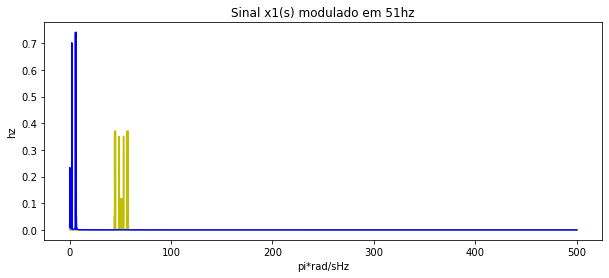

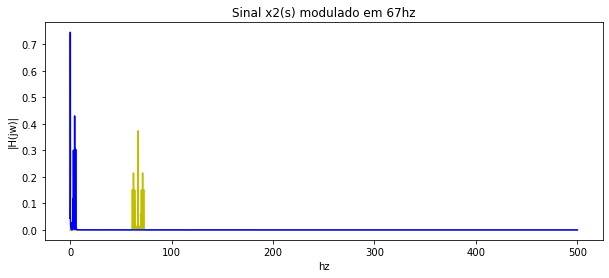

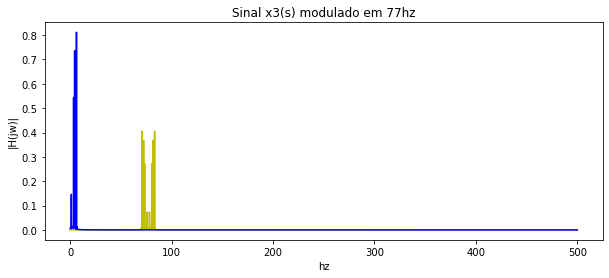

In [8]:
### SEU CÓDIGO COMEÇA AQUI ###
wc1=51*2*np.pi
wc2=67*2*np.pi
wc3=77*2*np.pi

xm1=x1lp*np.cos(wc1*t)
xm2=x2lp*np.cos(wc2*t)
xm3=x3lp*np.cos(wc3*t)

xms1=fft(xm1)/(len(xm1))
xms2=fft(xm2)/len(xm2)
xms3=fft(xm3)/(len(xm3))
xms1=xms1[:len(xms1)//2]
xms2=xms2[:len(xms2)//2]
xms3=xms3[:len(xms3)//2]

print("________legenda_______________")
print("|azul   - antes da modulação  |")
print("|amarelo-Depois da modulação  |")
print("|_____________________________|")



plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='y')
plt.plot(freq2,np.abs(x1lps),c='b')
plt.title("Sinal x1(s) modulado em 51hz")
plt.xlabel("pi*rad/sHz")
plt.ylabel("hz")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='y')
plt.plot(freq2,np.abs(x2lps),c='b')
plt.title("Sinal x2(s) modulado em 67hz")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='y')
plt.plot(freq2,np.abs(x3lps),c='b')
plt.title("Sinal x3(s) modulado em 77hz")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

2: 


C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.77024e-43): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.05411e-40): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.61613e-41): result may not be accurate.
  return solve(Q, P)


_____________________Eliminando a metade da banda____________________
________legenda____________
|azul   - antes do filtro  |
|amarelo-Depois do filtro  |
|__________________________|


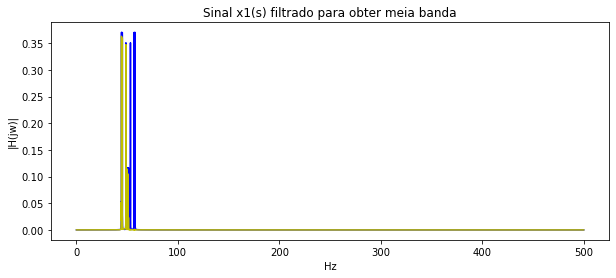

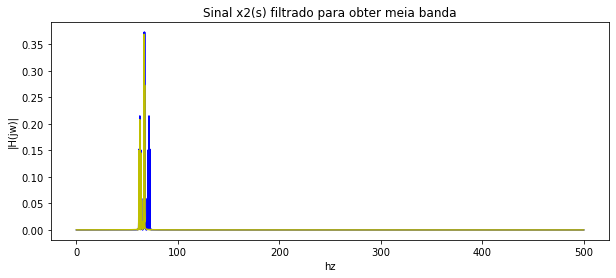

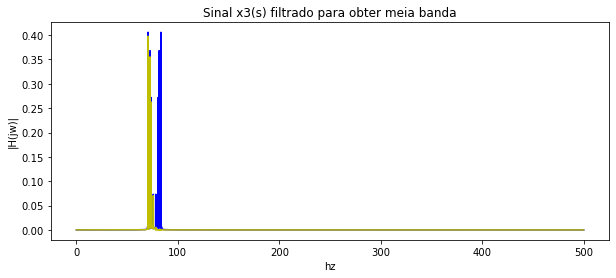

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###
print("2: ")

Tout1,xmf1,Xout=signal.lsim(filtrolp1, xm1,t)#aplicando filtro passa baixa no sinal x1
Tout2,xmf2,Xout=signal.lsim(filtrolp2, xm2,t)#aplicando filtro passa baixa no sinal x2
Tout3,xmf3,Xout=signal.lsim(filtrolp3, xm3,t)#aplicando filtro passa alta no sinal x3



print("_____________________Eliminando a metade da banda____________________")
print("________legenda____________")
print("|azul   - antes do filtro  |")
print("|amarelo-Depois do filtro  |")
print("|__________________________|")

xmfs1=fft(xmf1)/len(xmf1)# sinal x1s apos passar pelo filtro
xmfs2=fft(xmf2)/len(xmf2)# sinal x1s apos passar pelo filtro
xmfs3=fft(xmf3)/len(xmf3)# sinal x1s apos passar pelo filtro

xmfs1=xmfs1[:len(xmfs1)//2]
xmfs2=xmfs2[:len(xmfs2)//2]
xmfs3=xmfs3[:len(xmfs3)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='b')
plt.plot(freq2,np.abs(xmfs1),c='y')
plt.title("Sinal x1(s) filtrado para obter meia banda")
plt.xlabel("Hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='b')
plt.plot(freq2,np.abs(xmfs2),c='y')
plt.title("Sinal x2(s) filtrado para obter meia banda")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='b')
plt.plot(freq2,np.abs(xmfs3),c='y')
plt.title("Sinal x3(s) filtrado para obter meia banda")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()
### SEU CÓDIGO TERMINA AQUI ###

________legenda___________________
|azul   - x1(s) modulado e filtrado  |
|amarelo- x2(s) modulado e filtrado  |
|verde  - x3(s) modulado e filtrado  |
|____________________________________|


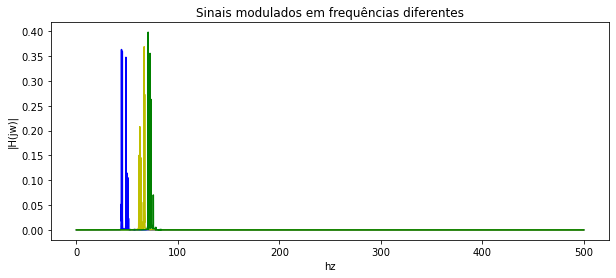

A distancia entres as frequências de modulação foram escolhidas
De forma a serem superior a metade da soma das duas  bandas


In [10]:
### SEU CÓDIGO COMEÇA AQUI ###
xm=xmf1+xmf2+xmf3
xms=fft(xm)/len(xm)

print("________legenda___________________")
print("|azul   - x1(s) modulado e filtrado  |")
print("|amarelo- x2(s) modulado e filtrado  |")
print("|verde  - x3(s) modulado e filtrado  |")
print("|____________________________________|")
plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xmfs1),c='b')
plt.plot(freq2,np.abs(xmfs2),c='y')
plt.plot(freq2,np.abs(xmfs3),c='g')
plt.title("Sinais modulados em frequências diferentes")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

print("A distancia entres as frequências de modulação foram escolhidas")
print("De forma a serem superior a metade da soma das duas  bandas")

### SEU CÓDIGO TERMINA AQUI ###

Resultado da modulação: 


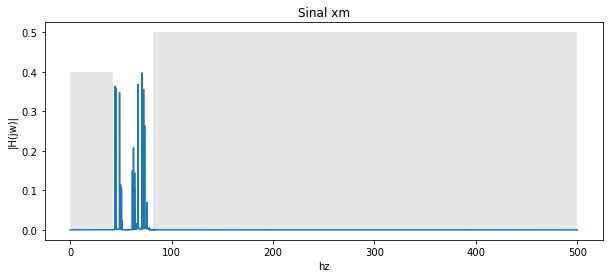

In [11]:
### SEU CÓDIGO COMEÇA AQUI ###
print("Resultado da modulação: ")
xms=xms[:len(xms)//2]
plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms))
plt.title("Sinal xm")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.fill([0,  42,  42, 0], [0,0, 0.4, 0.4], '0.9', lw=0)
plt.fill([82,  500,  500,   82], [0, 0, 0.5, 0.5], '0.9', lw=0)
plt.show()
### SEU CÓDIGO TERMINA AQUI ###

## Etapa de Demodulação/Demultiplexação

Nessa etapa você deve obter os três sinais recuperados, **obrigatoriamente nas variáveis** `x1r`, `x2r` e `x3r`. Esses sinais devem ser obtidos a partir do sinal modulado `xm` que contém todos os três sinais.

    1: Para separar os 3 sinais recebidos, são precisos 3 filtros, um passa baixa com wc=51hz, um passa alta com wc=67hz, e um passa faixa com wc1=51hz e wc2=67hz. O filtro criado anteriormente foi reutilizado, portanto, nessa etapa foi preciso criar apenas um filtro passa alta e um filtro passa faixa
    2: Utilização dos três filtros para separar os sinais
    3: Demodulação dos sinais multiplicando pelas cossenoides utilizadas para modulação 
    4: Filtrar o sinal novamente com frequencia de corte em 7hz para eliminar as "copias" do sinal que aparecem nas altas frequências apos a demodulação

1: Criação de um filtro passa alta com wc em 2*pi*67 rad/s.
Ordem do filtro Elliptico Lp:  10
Frequência de ressonância: 433.53978619539146 rad/s
Ordem do filtro Elliptico bp:  5
Frequência de ressonância: [376.99111843 420.97341558] rad/s


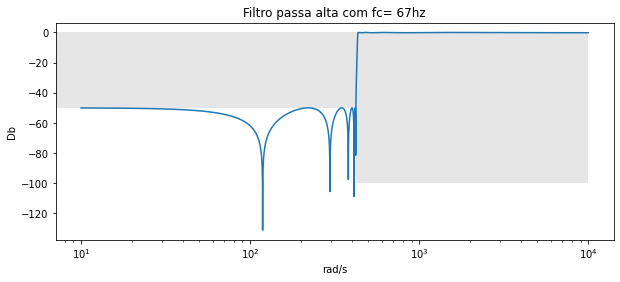

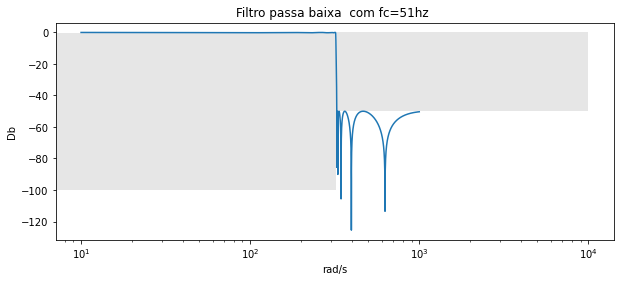

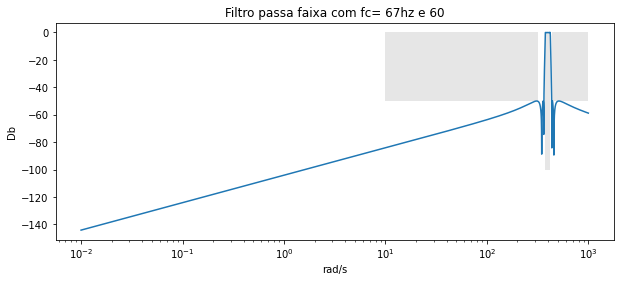

In [12]:
### SEU CÓDIGO COMEÇA AQUI ###
print("1: Criação de um filtro passa alta com wc em 2*pi*67 rad/s.")

%matplotlib inline
            #parametros do filtro
Ap=0.2  #atenuação Máxima na banda de passagem   
Ar=50   #atenuação mínima na banda de passagem
wr=67*2*np.pi  #frequencia de atenuaçãp
wp=69*2*np.pi  #frequencia de passagem

wrf=[51*2*np.pi, 70*2*np.pi]  #frequencia de atenuaçãp
wpf=[60*2*np.pi, 67*2*np.pi]  #frequencia de passagem


                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N,Wn   = signal.ellipord(wp, wr, Ap, Ar,analog=True)#filtro lp
Nf,Wnf   = signal.ellipord(wpf, wrf, Ap, Ar,analog=True)#filtro lp

print("Ordem do filtro Elliptico Lp: ", N)
print("Frequência de ressonância:", Wn,"rad/s")
z,  p, k = signal.ellip(N,Ap,Ar, Wn, 'hp', True,'zpk')
filtrohp=signal.lti(z,p,k)

print("Ordem do filtro Elliptico bp: ", Nf)
print("Frequência de ressonância:", Wnf,"rad/s")
z,  p, k = signal.ellip(Nf,Ap,Ar, Wnf, 'bp', True,'zpk')
filtrobp=signal.lti(z,p,k)

w,Hp= signal.freqresp(filtrohp)

plt.figure(figsize=(10,4))

plt.plot(w,20*np.log10(np.abs(Hp)))
plt.fill([0,  wp,  wp, 0], [-Ar, -Ar,0, 0], '0.9', lw=0)
plt.fill([wr,  10**4,  10**4,   wr], [-100, -100, -Ap, -Ap], '0.9', lw=0)
plt.title("Filtro passa alta com fc= 67hz")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(w1,20*np.log10(np.abs(H1)))
plt.fill([0,  wp1,  wp1, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr1,  10**4,  10**4,   wr1], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa  com fc=51hz ")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

w,Hp= signal.freqresp(filtrobp)

plt.figure(figsize=(10,4))

plt.plot(w,20*np.log10(np.abs(Hp)))
plt.fill([10,  wrf[0],  wrf[0], 10], [-Ar, -Ar,0, 0], '0.9', lw=0)
plt.fill([wpf[0],  wpf[1],  wpf[1], wpf[0]], [-100, -100,-Ap, -Ap], '0.9', lw=0)
plt.fill([wrf[1],  10**3,  10**3,   wrf[1]], [-Ar, -Ar, 0, 0], '0.9', lw=0)
plt.title("Filtro passa faixa com fc= 67hz e 60")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

2: 


C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.77024e-43): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=6.4602e-42): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=9.45409e-44): result may not be accurate.
  return solve(Q, P)


_____________________Obtendo os sinais separados____________________


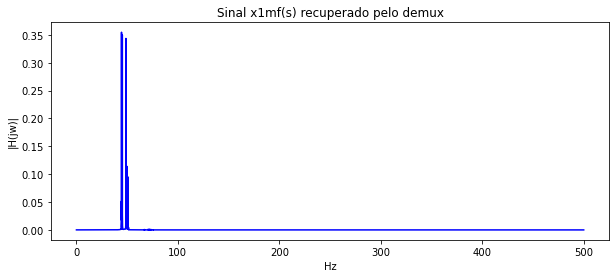

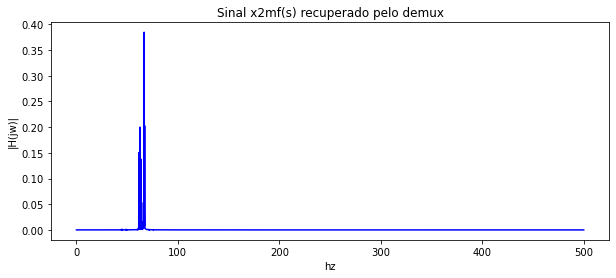

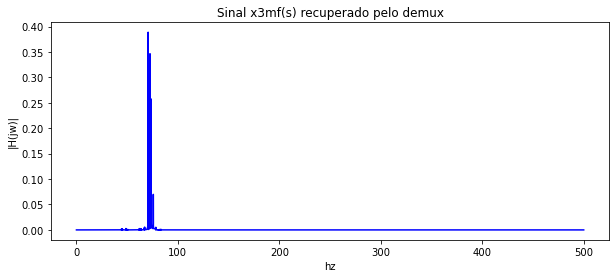

In [13]:
### SEU CÓDIGO COMEÇA AQUI ###
print("2: ")

Tout1,xm1,Xout=signal.lsim(filtrolp1, xm,t)#aplicando filtro passa baixa no sinal x1
Tout2,xm2,Xout=signal.lsim(filtrobp, xm,t)#aplicando filtro passa baixa no sinal x2
Tout3,xm3,Xout=signal.lsim(filtrohp, xm,t)#aplicando filtro passa alta no sinal x3



print("_____________________Obtendo os sinais separados____________________")

xms1=fft(xm1)/len(xm1)# sinal x1s apos passar pelo filtro
xms2=fft(xm2)/len(xm2)# sinal x1s apos passar pelo filtro
xms3=fft(xm3)/len(xm3)# sinal x1s apos passar pelo filtro

xms1=xms1[:len(xms1)//2]
xms2=xms2[:len(xms2)//2]
xms3=xms3[:len(xms3)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='b')
plt.title("Sinal x1mf(s) recuperado pelo demux")
plt.xlabel("Hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='b')
plt.title("Sinal x2mf(s) recuperado pelo demux")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='b')
plt.title("Sinal x3mf(s) recuperado pelo demux")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()
### SEU CÓDIGO TERMINA AQUI ###

Demodulando os sinais com ganho igual a 4
_____________________Obtendo os sinais separados____________________
________legenda_________________
|azul   - antes da demodulação  |
|amarelo-Depois da demodulação  |
|_______________________________|


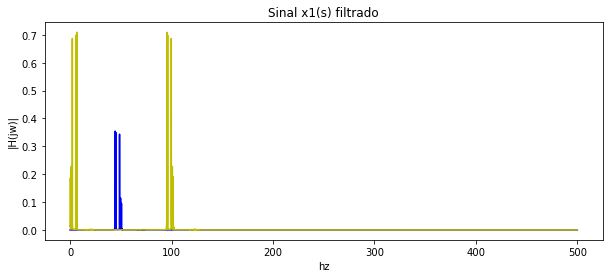

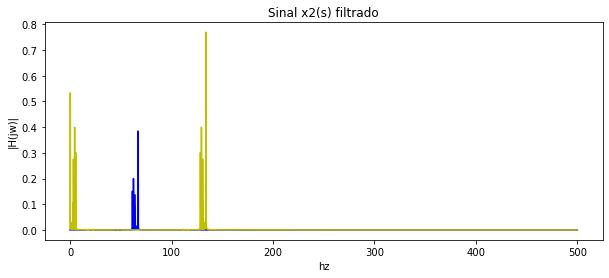

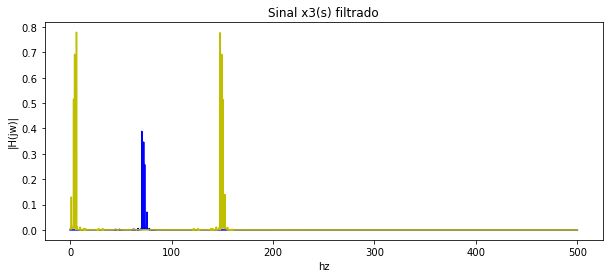

In [14]:
### SEU CÓDIGO COMEÇA AQUI ###
print("Demodulando os sinais com ganho igual a 4")

print("_____________________Obtendo os sinais separados____________________")
print("________legenda_________________")
print("|azul   - antes da demodulação  |")
print("|amarelo-Depois da demodulação  |")
print("|_______________________________|")
x1dm=4*xm1*np.cos(wc1*t)
x2dm=4*xm2*np.cos(wc2*t)
x3dm=4*xm3*np.cos(wc3*t)

x1dms=fft(x1dm)/len(x1dm)
x2dms=fft(x2dm)/len(x2dm)
x3dms=fft(x3dm)/len(x3dm)

x1dms=x1dms[:len(x1dms)//2]
x2dms=x2dms[:len(x2dms)//2]
x3dms=x3dms[:len(x3dms)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='b')
plt.plot(freq2,np.abs(x1dms),c='y')
plt.title("Sinal x1(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='b')
plt.plot(freq2,np.abs(x2dms),c='y')
plt.title("Sinal x2(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='b')
plt.plot(freq2,np.abs(x3dms),c='y')
plt.title("Sinal x3(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

4: Aplicando o filtro aos 3 sinais


C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=3.91264e-22): result may not be accurate.
  return solve(Q, P)


_____________________Sinais representados em tempo discreto____________________
________legenda____________
|azul   - antes do filtro  |
|amarelo-Depois do filtro  |
|__________________________|


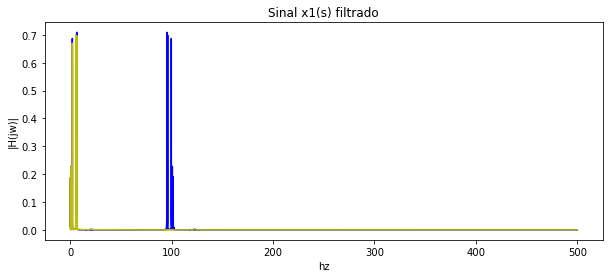

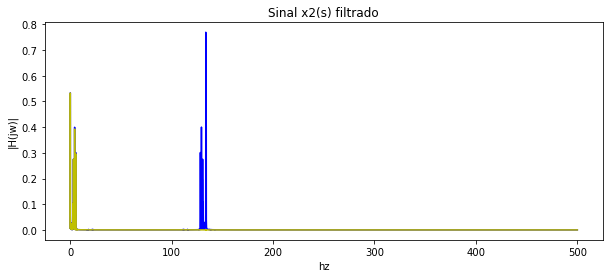

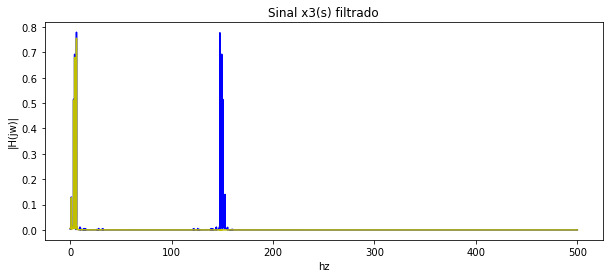

________________________________________________________________________________


In [15]:
### SEU CÓDIGO COMEÇA AQUI ###
print("4: Aplicando o filtro aos 3 sinais")

Tout1,x1r,Xout=signal.lsim(filtrolp, x1dm,t)#aplicando filtro passa baixa no sinal x1
Tout2,x2r,Xout=signal.lsim(filtrolp, x2dm,t)#aplicando filtro passa baixa no sinal x2
Tout3,x3r,Xout=signal.lsim(filtrolp, x3dm,t)#aplicando filtro passa alta no sinal x3

print("_____________________Sinais representados em tempo discreto____________________")
print("________legenda____________")
print("|azul   - antes do filtro  |")
print("|amarelo-Depois do filtro  |")
print("|__________________________|")

x1rs=fft(x1r)/len(x1r)# sinal x1s apos passar pelo filtro
x2rs=fft(x2r)/len(x2r)# sinal x1s apos passar pelo filtro
x3rs=fft(x3r)/len(x3r)# sinal x1s apos passar pelo filtro
x1rs=x1rs[:len(x1rs)//2]
x2rs=x2rs[:len(x2rs)//2]
x3rs=x3rs[:len(x3rs)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x1dms),c='b')
plt.plot(freq2,np.abs(x1rs),c='y')
plt.title("Sinal x1(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x2dms),c='b')
plt.plot(freq2,np.abs(x2rs),c='y')
plt.title("Sinal x2(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x3dms),c='b')
plt.plot(freq2,np.abs(x3rs),c='y')
plt.title("Sinal x3(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()
print("________________________________________________________________________________")

### SEU CÓDIGO TERMINA AQUI ###

# Comparação com original

Nessa etapa você deve comparar três sinais "ideais" (sem ruído), denotados por `x1i`, `x2i` e `x3i`, com os sinais recuperados `x1r`, `x2r` e `x3r`. Para cada par de sinal, faça o gráfico comparativo no domínio da frequência e no domínio do tempo. Ajuste adequadamente as escalas dos gráficos, rótulos e etc.

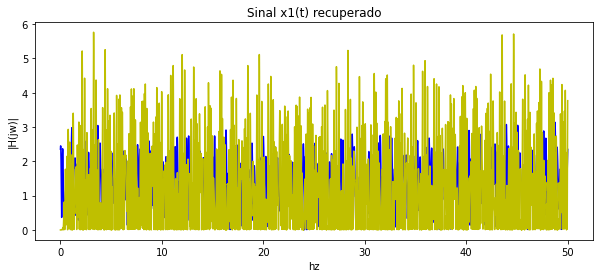

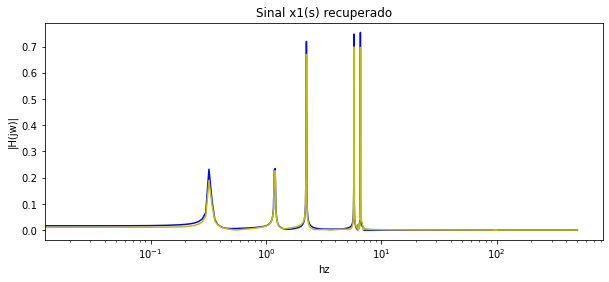

In [16]:
### SEU CÓDIGO COMEÇA AQUI ###
from scipy.fft import ifft
Us=(freq<7)
x1is=(fft(x1)/len(x1))*(Us)
x2is=(fft(x2)/len(x2))*(Us)
x3is=(fft(x3)/len(x3))*(Us)

x1i=ifft(x1is)*len(x1is)
x2i=ifft(x2is)*len(x2is)
x3i=ifft(x3is)*len(x3is)

x1is=x1is[:len(x1is)//2]
x2is=x2is[:len(x2is)//2]
x3is=x3is[:len(x3is)//2]

plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x1i),c='b')
plt.plot(t,np.abs(x1r),c='y')
plt.title("Sinal x1(t) recuperado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x1is),c='b')
plt.plot(freq2,np.abs(x1rs),c='y')
plt.title("Sinal x1(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

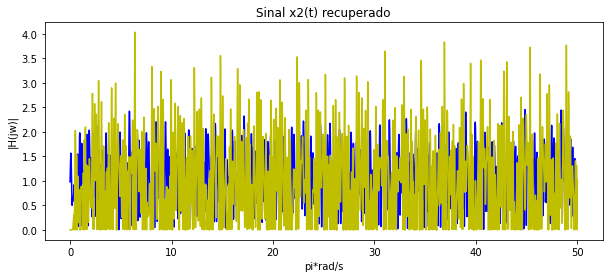

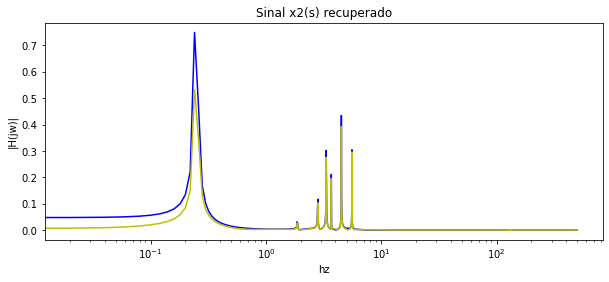

In [17]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x2i),c='b')
plt.plot(t,np.abs(x2r),c='y')
plt.title("Sinal x2(t) recuperado")
plt.xlabel("pi*rad/s")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x2is),c='b')
plt.plot(freq2,np.abs(x2rs),c='y')
plt.title("Sinal x2(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

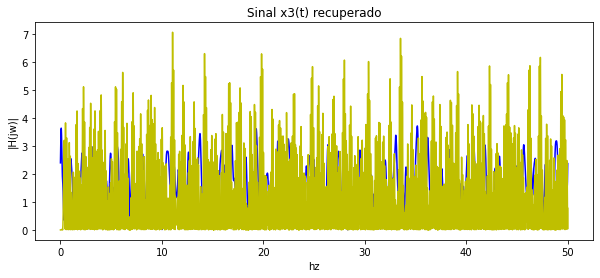

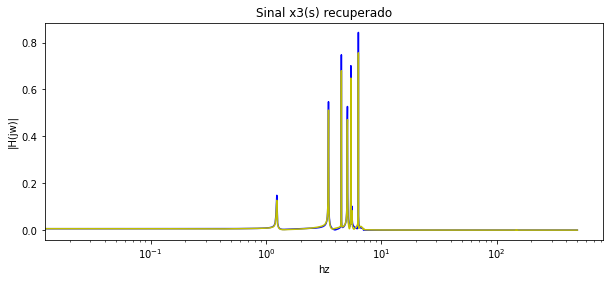

In [18]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x3i),c='b')
plt.plot(t,np.abs(x3r),c='y')
plt.title("Sinal x3(t) recuperado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x3is),c='b')
plt.plot(freq2,np.abs(x3rs),c='y')
plt.title("Sinal x3(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### SEU CÓDIGO TERMINA AQUI ###

**Saída esperada**:
1. Gráfico comparativo de `x1i` (original) e `x1r` (recuperado) no domínio do tempo.
1. Gráfico comparativo de `x1i` (original) e `x1r` (recuperado) no domínio da frequência.
1. Gráfico comparativo de `x2i` (original) e `x2r` (recuperado) no domínio do tempo.
1. Gráfico comparativo de `x2i` (original) e `x2r` (recuperado) no domínio da frequência.
1. Gráfico comparativo de `x3i` (original) e `x3r` (recuperado) no domínio do tempo.
1. Gráfico comparativo de `x3i` (original) e `x3r` (recuperado) no domínio da frequência.

___


# Desafio (não é obrigatório!)

Você é capaz de implementar o sistema acima para uma largura de banda ainda menor?

Na célula abaixo, implemente todo o sistema de modulação, multiplexação, demultiplexação, demodulação de forma a utilizar uma largura de banda entre 100 Hz e 118 Hz. Mostre os gráficos dos sinais antes e após a modulação. Mostre também o comparativo do sinal recuperado com o original. Use até cinco células de código.

________legenda_______________
|azul   - antes da modulação  |
|amarelo-Depois da modulação  |
|_____________________________|


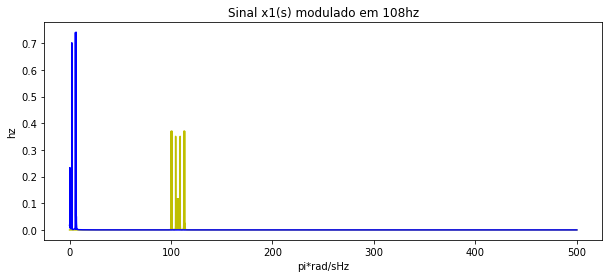

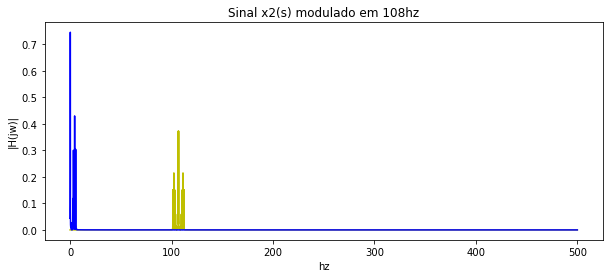

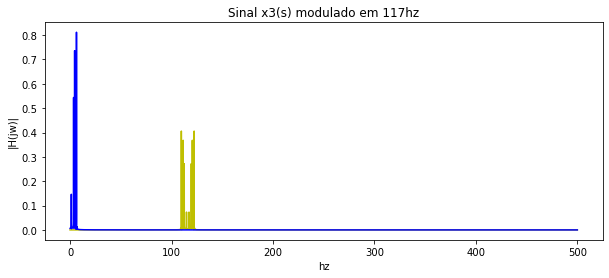

In [65]:
wc1=106.8*2*np.pi
wc2=106.8*2*np.pi
wc3=116*2*np.pi

xm1=x1lp*np.cos(wc1*t)
xm2=x2lp*np.sin(wc2*t)
xm3=x3lp*np.cos(wc3*t)

xms1=fft(xm1)/(len(xm1))
xms2=fft(xm2)/len(xm2)
xms3=fft(xm3)/(len(xm3))
xms1=xms1[:len(xms1)//2]
xms2=xms2[:len(xms2)//2]
xms3=xms3[:len(xms3)//2]

print("________legenda_______________")
print("|azul   - antes da modulação  |")
print("|amarelo-Depois da modulação  |")
print("|_____________________________|")



plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='y')
plt.plot(freq2,np.abs(x1lps),c='b')
plt.title("Sinal x1(s) modulado em 108hz")
plt.xlabel("pi*rad/sHz")
plt.ylabel("hz")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='y')
plt.plot(freq2,np.abs(x2lps),c='b')
plt.title("Sinal x2(s) modulado em 108hz")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='y')
plt.plot(freq2,np.abs(x3lps),c='b')
plt.title("Sinal x3(s) modulado em 117hz")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

### FIM DO CÓDIGO ###

Ordem do filtro Elliptico Lp1:  9
Frequência de ressonância: 107.0 hz
Ordem do filtro Elliptico Lp2:  10
Frequência de ressonância: 116.0 hz


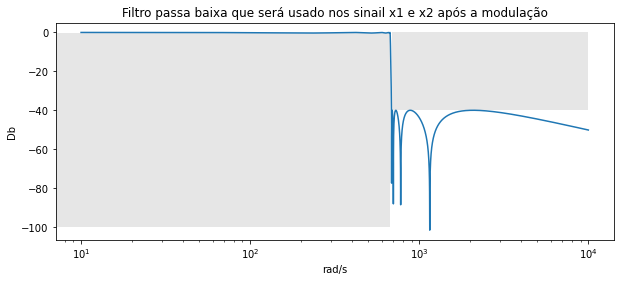

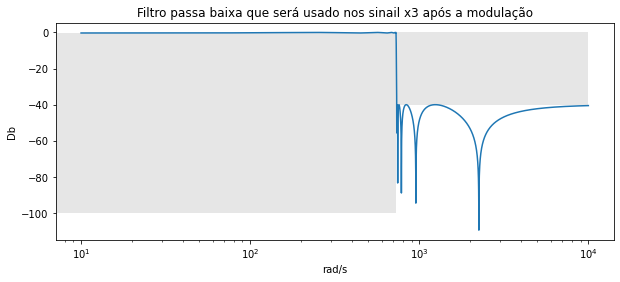

C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.8684e-39): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.32042e-44): result may not be accurate.
  return solve(Q, P)


_____________________Eliminando a metade da banda____________________
________legenda____________
|azul   - antes do filtro  |
|amarelo-Depois do filtro  |
|__________________________|


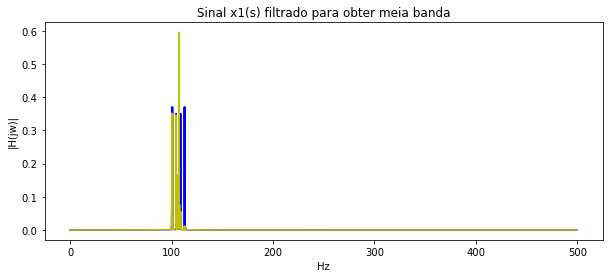

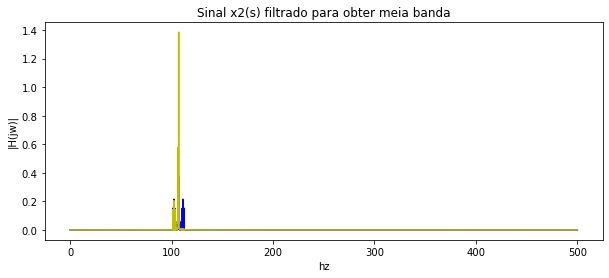

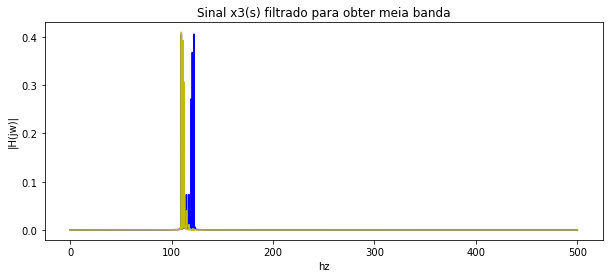

Resultado da modulação: 


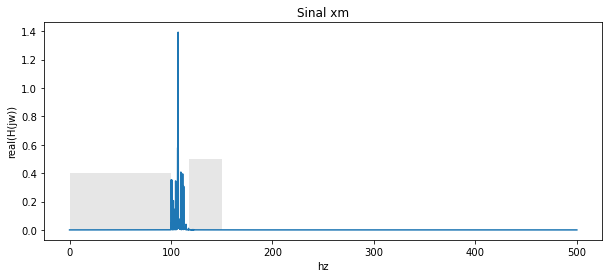

In [66]:
%matplotlib inline
            #parametros do filtro
Ap=0.3  #atenuação Máxima na banda de passagem   
Ar=40   #atenuação mínima na banda de passagem
wr1=109.5*2*np.pi  #frequencia de atenuaçãp
wp1=107*2*np.pi  #frequencia de passagem
wr2=118*2*np.pi  #frequencia de atenuaçãp
wp2=116*2*np.pi  #frequencia de passagem


                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N1,Wn1    = signal.ellipord(wp1, wr1, Ap, Ar,analog=True)#filtro lp
N2,Wn2    = signal.ellipord(wp2, wr2, Ap, Ar,analog=True)#filtro lp



print("Ordem do filtro Elliptico Lp1: ", N1)
print("Frequência de ressonância:", Wn1/(2*np.pi),"hz")
z1,  p1, k1 = signal.ellip(N1,Ap,Ar, Wn1, 'lp', True,'zpk')
filtrolp1=signal.lti(z1,p1,k1)

print("Ordem do filtro Elliptico Lp2: ", N2)
print("Frequência de ressonância:", Wn2/(2*np.pi),"hz")
z2,  p2, k2 = signal.ellip(N2,Ap,Ar, Wn2, 'lp', True,'zpk')
filtrolp2=signal.lti(z2,p2,k2)


w1,H1= signal.freqresp(filtrolp1)
w2,H2= signal.freqresp(filtrolp2)


plt.figure(figsize=(10,4))
plt.plot(w1,20*np.log10(np.abs(H1)))
plt.fill([0,  wp1,  wp1, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr1,  10**4,  10**4,   wr1], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa que será usado nos sinail x1 e x2 após a modulação")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(w2,20*np.log10(np.abs(H2)))
plt.fill([0,  wp2,  wp2, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr2,  10**4,  10**4,   wr2], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa que será usado nos sinail x3 após a modulação")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

Tout1,xmf1,Xout=signal.lsim(filtrolp1, xm1,t)#aplicando filtro passa baixa no sinal x1
Tout2,xmf2,Xout=signal.lsim(filtrolp1, xm2,t)#aplicando filtro passa baixa no sinal x2
Tout3,xmf3,Xout=signal.lsim(filtrolp2, xm3,t)#aplicando filtro passa alta no sinal x3



print("_____________________Eliminando a metade da banda____________________")
print("________legenda____________")
print("|azul   - antes do filtro  |")
print("|amarelo-Depois do filtro  |")
print("|__________________________|")

xmfs1=fft(xmf1)/len(xmf1)# sinal x1s apos passar pelo filtro
xmfs2=fft(xmf2)/len(xmf2)# sinal x1s apos passar pelo filtro
xmfs3=fft(xmf3)/len(xmf3)# sinal x1s apos passar pelo filtro

xmfs1=xmfs1[:len(xmfs1)//2]
xmfs2=xmfs2[:len(xmfs2)//2]
xmfs3=xmfs3[:len(xmfs3)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='b')
plt.plot(freq2,np.abs(xmfs1),c='y')
plt.title("Sinal x1(s) filtrado para obter meia banda")
plt.xlabel("Hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='b')
plt.plot(freq2,np.abs(xmfs2),c='y')
plt.title("Sinal x2(s) filtrado para obter meia banda")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='b')
plt.plot(freq2,np.abs(xmfs3),c='y')
plt.title("Sinal x3(s) filtrado para obter meia banda")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

xm=xmf1+xmf2+xmf3
xms=fft(xm)/len(xm)


print("Resultado da modulação: ")
xms=xms[:len(xms)//2]
plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms))
plt.title("Sinal xm")
plt.xlabel("hz")
plt.ylabel("real(H(jw))")
plt.fill([0,  100,  100, 0], [0,0, 0.4, 0.4], '0.9', lw=0)
plt.fill([118,  150,  150,   118], [0, 0, 0.5, 0.5], '0.9', lw=0)
plt.show()




Ordem do filtro Elliptico hp:  10
Frequência de ressonância: 108.99999999999999 hz


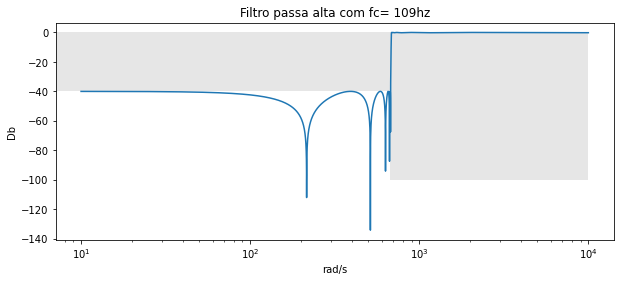

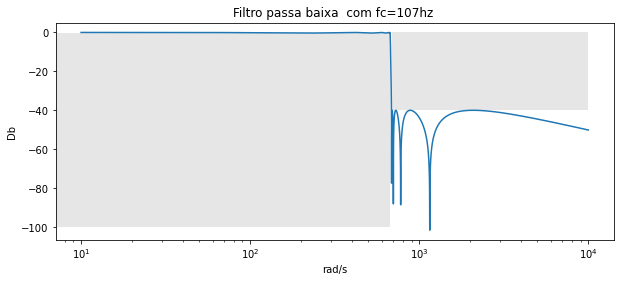

C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.8684e-39): result may not be accurate.
  return solve(Q, P)
C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.09354e-46): result may not be accurate.
  return solve(Q, P)


_____________________Obtendo os sinais separados____________________


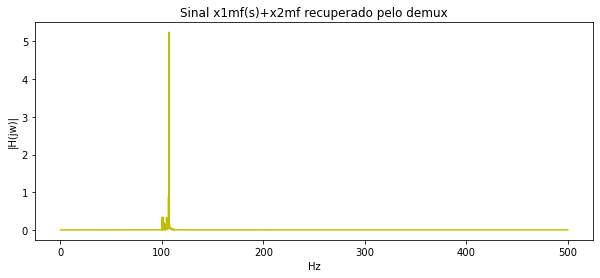

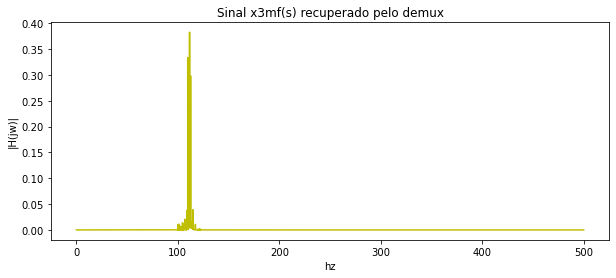

In [68]:

%matplotlib inline
            #parametros do filtro
Ap=0.2  #atenuação Máxima na banda de passagem   
Ar=40   #atenuação mínima na banda de passagem
wr=106.9*2*np.pi  #frequencia de atenuaçãp
wp=109*2*np.pi  #frequencia de passagem



                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N,Wn   = signal.ellipord(wp, wr, Ap, Ar,analog=True)#filtro hp


print("Ordem do filtro Elliptico hp: ", N)
print("Frequência de ressonância:", Wn/(2*np.pi),"hz")
z,  p, k = signal.ellip(N,Ap,Ar, Wn, 'hp', True,'zpk')
filtrohp=signal.lti(z,p,k)

w,Hp= signal.freqresp(filtrohp)

plt.figure(figsize=(10,4))

plt.plot(w,20*np.log10(np.abs(Hp)))
plt.fill([0,  wp,  wp, 0], [-Ar, -Ar,0, 0], '0.9', lw=0)
plt.fill([wr,  10**4,  10**4,   wr], [-100, -100, -Ap, -Ap], '0.9', lw=0)
plt.title("Filtro passa alta com fc= 109hz")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(w1,20*np.log10(np.abs(H1)))
plt.fill([0,  wp1,  wp1, 0], [-Ap, -Ap,-100, -100], '0.9', lw=0)
plt.fill([wr1,  10**4,  10**4,   wr1], [0, 0, -Ar, -Ar], '0.9', lw=0)
plt.title("Filtro passa baixa  com fc=107hz ")
plt.xscale('log')
plt.xlabel("rad/s")
plt.ylabel("Db")
plt.show()


Tout1,xm1,Xout=signal.lsim(filtrolp1, xm,t)#aplicando filtro passa baixa no sinal x1
Tout2,xm2,Xout=signal.lsim(filtrolp1, xm,t)#aplicando filtro passa baixa no sinal x2
Tout3,xm3,Xout=signal.lsim(filtrohp, xm,t)#aplicando filtro passa alta no sinal x3



print("_____________________Obtendo os sinais separados____________________")

xms1=fft(xm1)/len(xm1)# sinal x1s apos passar pelo filtro
xms2=fft(xm2)/len(xm2)# sinal x1s apos passar pelo filtro
xms3=fft(xm3)/len(xm3)# sinal x1s apos passar pelo filtro

xms1=xms1[:len(xms1)//2]
xms2=xms2[:len(xms2)//2]
xms3=xms3[:len(xms3)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='y')
plt.title("Sinal x1mf(s)+x2mf recuperado pelo demux")
plt.xlabel("Hz")
plt.ylabel("|H(jw)|")
plt.show()



plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='y')
plt.title("Sinal x3mf(s) recuperado pelo demux")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

Demodulando os sinais com ganho igual a 4
_____________________Obtendo os sinais separados____________________
________legenda_________________
|azul   - antes da demodulação  |
|amarelo-Depois da demodulação  |
|_______________________________|


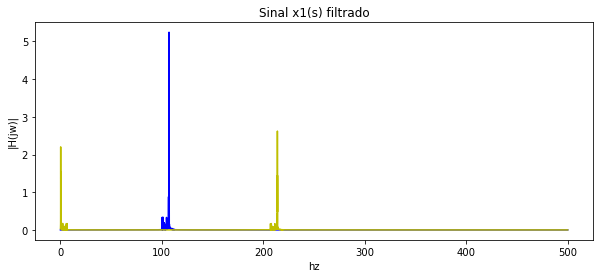

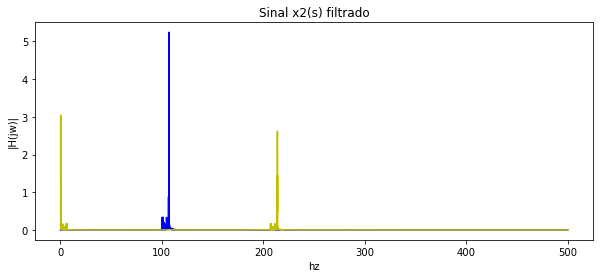

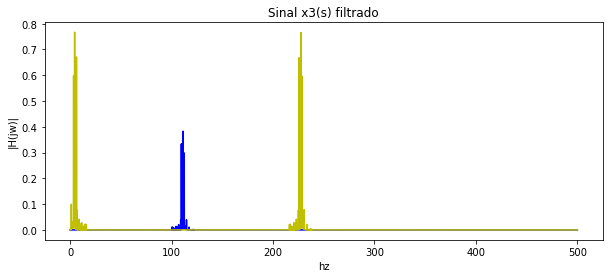

In [70]:
print("Demodulando os sinais com ganho igual a 4")

print("_____________________Obtendo os sinais separados____________________")
print("________legenda_________________")
print("|azul   - antes da demodulação  |")
print("|amarelo-Depois da demodulação  |")
print("|_______________________________|")
x1dm=xm1*np.cos(wc1*t)
x2dm=xm2*np.sin(wc2*t)
x3dm=4*xm3*np.cos(wc3*t)

x1dms=fft(x1dm)/len(x1dm)
x2dms=fft(x2dm)/len(x2dm)
x3dms=fft(x3dm)/len(x3dm)

x1dms=x1dms[:len(x1dms)//2]
x2dms=x2dms[:len(x2dms)//2]
x3dms=x3dms[:len(x3dms)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms1),c='b')
plt.plot(freq2,np.abs(x1dms),c='y')
plt.title("Sinal x1(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms2),c='b')
plt.plot(freq2,np.abs(x2dms),c='y')
plt.title("Sinal x2(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(xms3),c='b')
plt.plot(freq2,np.abs(x3dms),c='y')
plt.title("Sinal x3(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()


C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=3.91264e-22): result may not be accurate.
  return solve(Q, P)


________legenda____________
|azul   - antes do filtro  |
|amarelo-Depois do filtro  |
|__________________________|


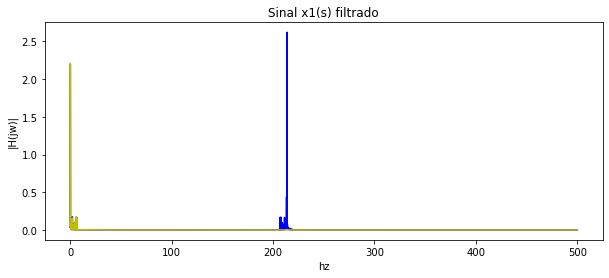

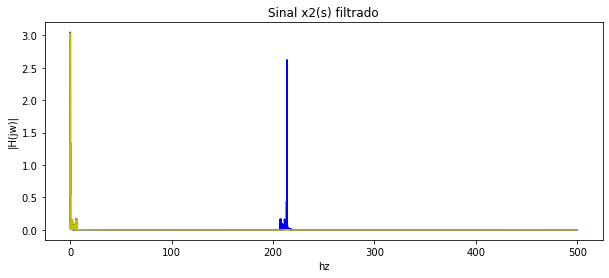

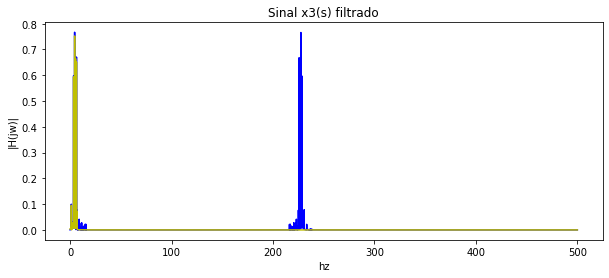

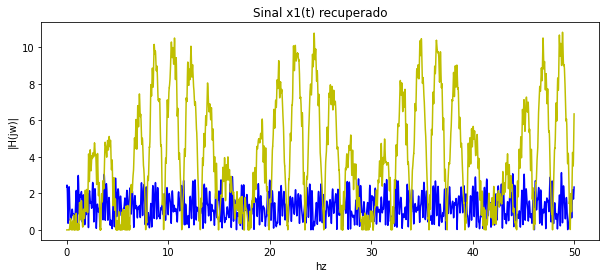

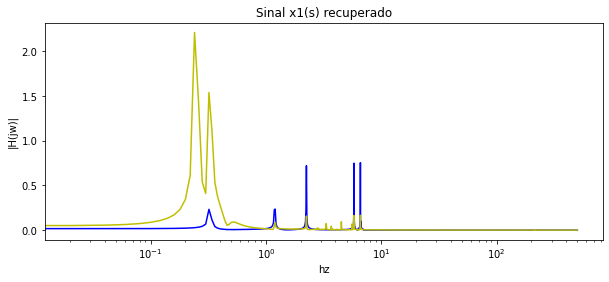

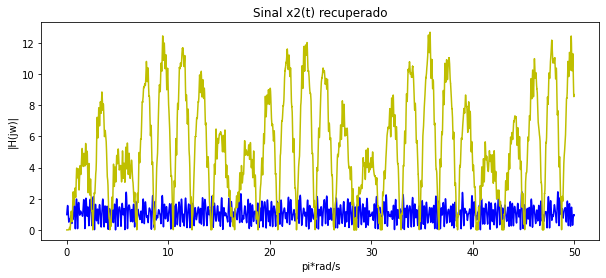

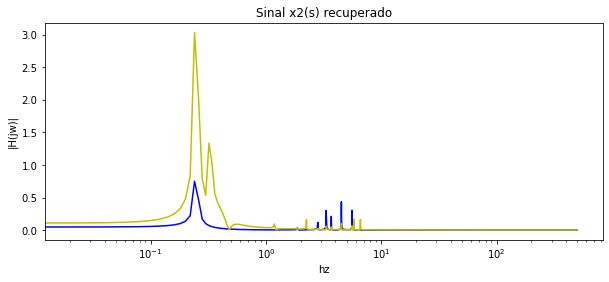

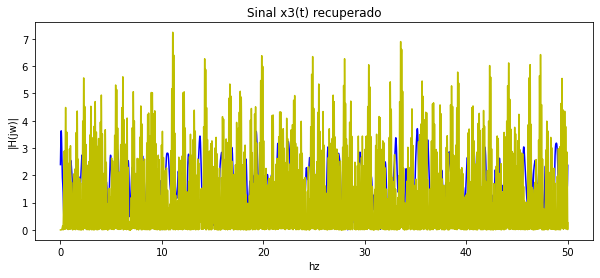

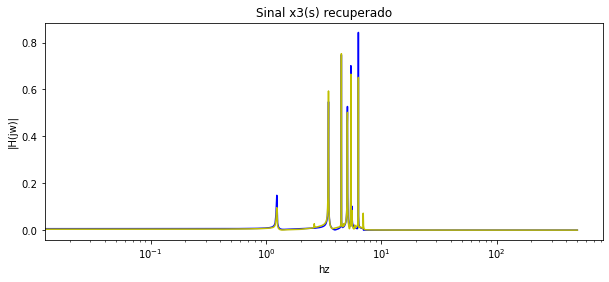

In [71]:
Tout1,x1r,Xout=signal.lsim(filtrolp, x1dm,t)#aplicando filtro passa baixa no sinal x1
Tout2,x2r,Xout=signal.lsim(filtrolp, x2dm,t)#aplicando filtro passa baixa no sinal x2
Tout3,x3r,Xout=signal.lsim(filtrolp, x3dm,t)#aplicando filtro passa alta no sinal x3


print("________legenda____________")
print("|azul   - antes do filtro  |")
print("|amarelo-Depois do filtro  |")
print("|__________________________|")

x1rs=fft(x1r)/len(x1r)# sinal x1s apos passar pelo filtro
x2rs=fft(x2r)/len(x2r)# sinal x1s apos passar pelo filtro
x3rs=fft(x3r)/len(x3r)# sinal x1s apos passar pelo filtro
x1rs=x1rs[:len(x1rs)//2]
x2rs=x2rs[:len(x2rs)//2]
x3rs=x3rs[:len(x3rs)//2]

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x1dms),c='b')
plt.plot(freq2,np.abs(x1rs),c='y')
plt.title("Sinal x1(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x2dms),c='b')
plt.plot(freq2,np.abs(x2rs),c='y')
plt.title("Sinal x2(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x3dms),c='b')
plt.plot(freq2,np.abs(x3rs),c='y')
plt.title("Sinal x3(s) filtrado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x1i),c='b')
plt.plot(t,np.abs(x1r),c='y')
plt.title("Sinal x1(t) recuperado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x1is),c='b')
plt.plot(freq2,np.abs(x1rs),c='y')
plt.title("Sinal x1(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x2i),c='b')
plt.plot(t,np.abs(x2r),c='y')
plt.title("Sinal x2(t) recuperado")
plt.xlabel("pi*rad/s")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x2is),c='b')
plt.plot(freq2,np.abs(x2rs),c='y')
plt.title("Sinal x2(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t,np.abs(x3i),c='b')
plt.plot(t,np.abs(x3r),c='y')
plt.title("Sinal x3(t) recuperado")
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freq2,np.abs(x3is),c='b')
plt.plot(freq2,np.abs(x3rs),c='y')
plt.title("Sinal x3(s) recuperado")
plt.xscale('log')
plt.xlabel("hz")
plt.ylabel("|H(jw)|")
plt.show()

___

# Concluões

Escreva as conclusões deste trabalho e o que de mais interessante você observou. Escreva abaixo conclusões de ordem técnica apenas, sobre os prós e contras de cada ferramenta usada e principais características observadas.

 A demodulação em amplitude usada no trabalho mostrou-se simples e eficaz, porém, devido ao fato de a banda ter sido estreita, foi necessário eliminar metade da banda e construir filtros de ordem elevada para a obtenção dos sinais com o mínimo de ruído.
Desafio: Quando a faixa de transmissão se tornou muito estreita, foi necessário fazer a modulação de dois sinais em uma mesmo frequência, defasados em piradianos.Porém, os sinais não foram recuperados corretamente.

Parabéns por ter completado o trabalho :c)